이전 시간에 이어서...

# 딥러닝 - 인공 신경망

## 인공 신경망

[강의자료](https://github.com/yonggyo1125/lecture_ml-dl/tree/master/07.%20%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84%20%EC%8B%9C%EC%9E%91%ED%95%A9%EB%8B%88%EB%8B%A4/07-1.%20%EC%9D%B8%EA%B3%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D)

### 키워드 정리

- 인공 신경망 (Artificial Neural Network)
    - 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘\
    -> 이름은 '신경망'이지만, 실제 우리 뇌를 모델링한 것은 아님
    - 기존의 머신러닝 알고리즘으로 다루기 어려웠던 이미지, 음성, 자연어 처리(NLP) 분야에서 뛰어난 성능을 발휘하면서 크게 주목받음
    - 인공 신경망을 여러 층으로 깊게 쌓은 알고리즘을 **딥러닝(Deep Learning)**이라고 부름
- 텐서플로 (TensorFlow)
    - Tensor: 다차원 배열
    > Vector: 1차원 배열, Matrix: 2차원 배열, 3-Tensor: 3차원 배열 / ...
    - 구글이 만든 딥러닝 라이브러리로 매우 인기가 높다.
    - CPU와 GPU를 사용해 인공 신경망 모델을 효율적으로 훈련하여 모델 구축과 서비스에 필요한 다양한 도구를 제공
    - 백엔드 연산 엔진으로서, GPU/TPU를 활용하여 고속 연산 가능
    - 텐서플로 2.0부터는 신경망 모델을 빠르게 구성할 수 있는 **Keras API**를 기본 인터페이스로 채택\
    -> 간단한 코드로 딥러닝 모델을 직관적으로 구성 가능
    - Keras(케라스)는 복잡한 딥러닝 모델(합성곱, 순환 신경망 등)도 간결하게 구성할 수 있게 해줌
- 밀집층 (Dense Layer) = 은닉층 (Hidden Layer)
    - 가장 간단한 인공 신경망 층
    - 모든 입력 뉴런이 모든 출력 뉴런에 연결\
    -> **완전 연결 층(fully connected layer)**이라고도 불림
    - 출력층에 밀집층을 사용할 경우, 분류하려는 클래스와 동일한 개수의 뉴런을 사용해 각 클래스에 대한 점수 또는 확률 출력
- 원-핫 인코딩 (One-hot Encoding)
    - `loss='categorical_crossentropy'`(다중 분류)일 때 타겟값을 0, 1로 변경하는 기법
    - 정수값을 배열에서 해당 정수의 위치의 원소만 1이고 나머지는 모두 0으로 변환
    - 이런 변환이 필요한 이유:\
        다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해서.\
        텐서플로에서는 sparse_categorical_entropy 손실을 지정하면 이런 변환을 수행할 필요가 없다.

### 핵심 패키지와 함수
`TensorFlow`
- `Dense`
    - 신경망에서 가장 기본 층인 밀집층을 만드는 클래스입니다.
    - 이 층에서 첫 번째 매개변수에는 뉴런의 개수를 지정합니다.
    - activation 매개변수에는 사용할 활성화 함수를 지정합니다. 대표적으로 sigmoid, softmax 함수가 있습니다. 아무것도 지정하지 않으면 활성화 함수를 사용하지 않습니다.
- `Sequential`
    - 케라스에서 신경망 모델을 만드는 클래스입니다.
    - 이 클래스의 객체를 생성할 때 신경망 모델에 추가할 층을 지정할 수 있습니다.
    - 추가할 층이 1개 이상일 경우 파이썬 리스트로 전달합니다.
- `compile()`
    - 모델 객체를 만든 후 훈련하기 전에 사용할 손실 함수와 측정 지표등을 지정하는 메서드입니다.
    - loss 매개변수에 손실함수를 지정합니다. 이진 분류일 경우 binary_crossentropy, 다중 분류일 경우 categorical_crossentropy로 지정합니다. 회귀 모델일 경우 mean_square_error 등으로 지정할 수 있습니다.
    - metrics 매개변수에 훈련 과정에서 측정하고 싶은 지표를 지정할 수 있습니다. 측정 지표가 1개 이상일 경우 리스트로 전달합니다.
- `fit()`
    - 모델을 훈련하는 메서드입니다.
    - 첫 번째와 두 번째 매개변수에 입력하는 타깃 데이터를 전달합니다.
    - epochs 매개변수에 전체 데이터에 대해 반복할 에포크 횟수를 지정합니다.
- `evaluate()`
    - 모델 성능을 평가하는 메서드입니다.
    - 첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달합니다.
    - compile() 메서드에서 loss 매개변수에 지정한 손실 함수의 값과 metrics 매개변수에 지정한 측정 지표를 출력합니다.


In [16]:
import keras

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [17]:
print(train_input.shape, test_input.shape)

(60000, 28, 28) (10000, 28, 28)


In [18]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

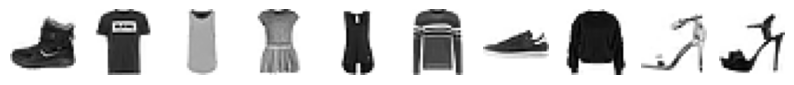

In [19]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):  # 훈련 이미지 중 앞의 10개 시각화
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')

plt.show()

In [20]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [21]:
# 정규화: 0~255 -> 0~1로 범위 변환 (최댓값(255)으로 나누기)
train_scaled = train_input / 255.0
# train_scaled[0]
train_scaled = train_scaled.reshape(-1, 28 * 28)  # 28 x 28

In [22]:
# 훈련세트, 검증세트 분리
from sklearn.model_selection import train_test_split
_train_scaled, val_scaled, _train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [23]:
train_scaled.shape

(60000, 784)

In [24]:
# 입력층, 출력층 분리
import keras
inputs = keras.layers.Input(shape=(28 * 28, ))  # shape: 입력은 28x28 이미지를 1차원으로 평탄화한 784개의 픽셀
outputs = keras.layers.Dense(10, activation='softmax')  # 출력층에 뉴런 10개 → 각 뉴런은 하나의 클래스에 대응 -> 확률로 변환 필요! -> softmax로 활성화 함수 지정
model = keras.Sequential([inputs, outputs])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

\----- 여기까지 day08의 ex04 복습! -----

In [28]:
# 컴파일:
# - 손실 함수(loss), 옵티마이저(optimizer) 등 설정
# - 측정(metrics) 지표 (정확도 점수)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

원-핫 인코딩 변환! -> ex02 예제 참고

In [29]:
# 타겟 -> 원-핫 인코딩 변환
target_encoded = keras.utils.to_categorical(train_target)
target_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
# fit() 옵션
# - batch_size: 기본값 32 (미니 배치 경사 하강법)
# - epochs: 반복 학습 횟수
# - verbose: 0 - 상세 로그 출력 X / 1 - 상세 로그 출력 O
# - validation_data: 검증 세트 데이터

model.fit(train_scaled, target_encoded, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - accuracy: 0.7451 - loss: 0.7450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.8390 - loss: 0.4708
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.8476 - loss: 0.4488
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.8549 - loss: 0.4337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8546 - loss: 0.4339


**원-핫 인코딩 생략**\
`loss='sparse_categorical_crossentropy'`

In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step - accuracy: 0.8528 - loss: 0.4247
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8604 - loss: 0.4160
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8590 - loss: 0.4177
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.8594 - loss: 0.4109
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.8649 - loss: 0.4012


In [ ]:
# 모델에 대한 최종 평가(테스트세트) - model.evaluate()

# 테스트세트 스케일링(전처리)
test_scaled = test_input / 255.0
test_scaled = test_scaled.reshape(-1, 28 * 28)

# 전처리된 테스트 입력과 정답 레이블로 학습된 모델의 최종 성능 평가
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8458 - loss: 0.4587


[0.4765080213546753, 0.8424999713897705]

loss: 0.4765080213546753\
accuracy(정확도): 0.8424999713897705 (약 84%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


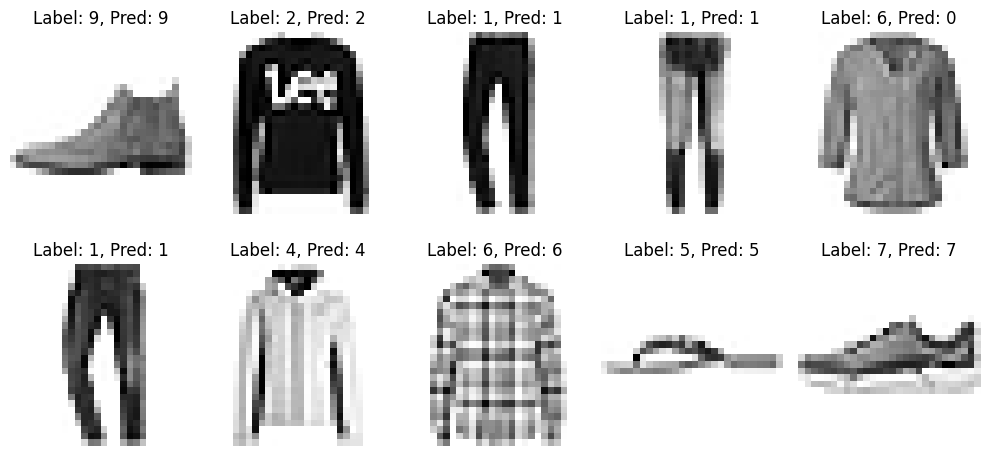

In [39]:
# 테스트 샘플 중 10개만 시각화
plt.figure(figsize=(10, 5))

for i in range(10):
    # 1D → 2D로 reshape
    image = test_scaled[i].reshape(28, 28)
    true_label = test_target[i]

    # 예측값
    pred = model.predict(test_scaled[i].reshape(1, -1))
    pred_label = np.argmax(pred)

    # 시각화
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray_r')
    plt.title(f"Label: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 이제 은닉층을 쌓아보자!
ex03에서...